In [1]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

from dotenv import load_dotenv
load_dotenv("../.env")
DATASET_PATH=os.getenv("DATASET_DIRECTORY")
DATASET_PATH=os.path.join("/data/radnav/radnav_model_datasets")
MODEL_TRAINING_DATASET_PATH=os.getenv("MODEL_TRAINING_DATASET_PATH")
GENERATED_DATASETS_PATH=os.getenv("GENERATED_DATASETS_PATH")


sys.path.append("../")
from cpsl_datasets.gnn_node_ds import GnnNodeDS

from mmwave_model_integrator.input_encoders._node_encoder import _NodeEncoder
from mmwave_model_integrator.ground_truth_encoders._gt_node_encoder import _GTNodeEncoder
from mmwave_model_integrator.plotting.plotter_gnn_pc_processing import PlotterGnnPCProcessing


/home/david/.cache/pypoetry/virtualenvs/odometry-JJ4jnFPp-py3.12/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
#initialize the dataset
config_label = "Hermes_60fh_0_1th"

dataset_path = os.path.join(DATASET_PATH,"{}_train".format(config_label))
dataset = GnnNodeDS(
    dataset_path=dataset_path,
    node_folder="nodes",
    label_folder="labels"
)
print(dataset_path)

found 7201 node samples
found 7201 label samples
/data/radnav/radnav_model_datasets/Hermes_60fh_0_1th_train


In [3]:
#initialize the encoder and decoder
input_encoder = _NodeEncoder()
ground_truth_encoder = _GTNodeEncoder()
plotter = PlotterGnnPCProcessing()

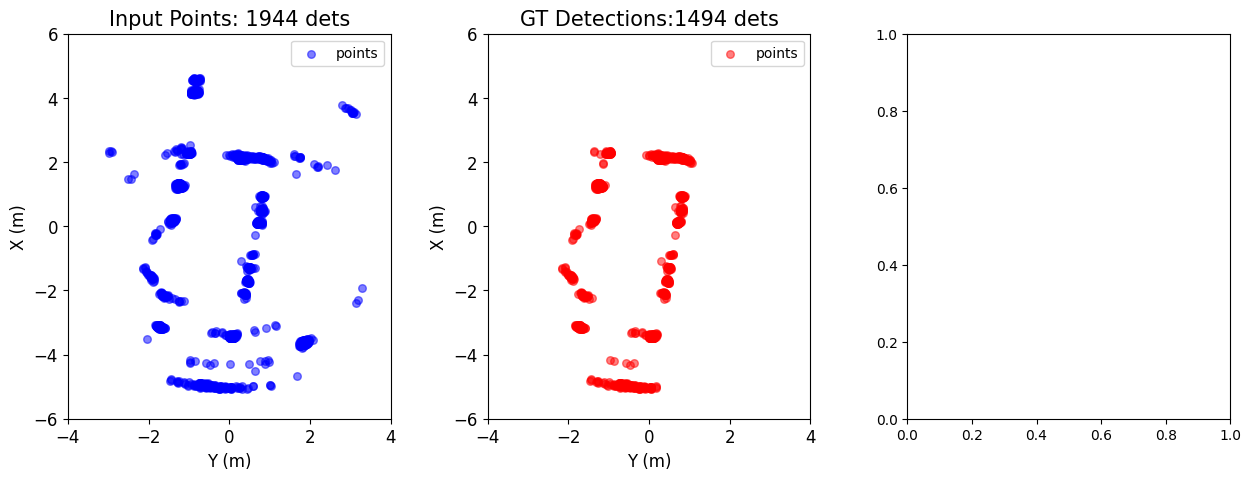

In [4]:
#plot a sample from the training dataset
idx=2000
nodes = dataset.get_node_data(idx=idx)
labels = dataset.get_label_data(idx=idx)

plotter.plot_compilation(
    input_data=nodes,
    gt_data=labels,
    input_encoder=input_encoder,
    ground_truth_encoder=ground_truth_encoder,
    show=True
)

In [5]:
from mmwave_model_integrator.config import Config
import mmwave_model_integrator.torch_training.trainers as trainers

config_path = "../configs/RaGNNarok/RaGNNarok_uav.py"
config = Config(config_path)

config.print_config()

trainer_config = config.trainer
trainer_class = getattr(trainers,trainer_config.pop('type'))
trainer = trainer_class(**trainer_config)

model=dict(
    type=SageGNNClassifier,
    in_channels=4,
    hidden_channels=16,
    out_channels=1,
),
config_label=Hermes_60fh_0_1th,
generated_dataset=dict(
    input_encoding_folder=nodes,
    ground_truth_encoding_folder=labels,
    generated_dataset_path=/data/radnav/radnav_model_datasets/Hermes_60fh_0_1th_train,
),
trainer=dict(
    type=GNNTorchTrainer,
    model=dict(
        type=SageGNNClassifier,
        in_channels=4,
        hidden_channels=16,
        out_channels=1,
    ),
    optimizer=dict(
        type=Adam,
        lr=0.001,
    ),
    loss_fn=dict(
        type=BCELoss,
    ),
    dataset=dict(
        type=_GnnNodeDataset,
        edge_radius=1.0,
        transforms=[],
        enable_random_yaw_rotate=True,
        enable_occupancy_grid_preturbations=True,
        enable_x_y_position_preturbations=True,
        enable_cylindrical_encoding=False,
    ),
    data_loader=dict(
        type=TGDataLoader,
        batch_size=256,
        shuffle=True,
        num_wor

In [6]:
trainer.train_model()

ModelTrainer.train: training the network...


  8%|▊         | 1/13 [00:09<01:53,  9.49s/it]

EPOCH: 1/13
	 Train loss: 0.650147020816803, Val loss:0.6460914611816406


 15%|█▌        | 2/13 [00:18<01:43,  9.38s/it]

EPOCH: 2/13
	 Train loss: 0.5674648880958557, Val loss:0.6087026596069336


 23%|██▎       | 3/13 [00:28<01:34,  9.42s/it]

EPOCH: 3/13
	 Train loss: 0.54698246717453, Val loss:0.5998023748397827


 31%|███       | 4/13 [00:37<01:25,  9.50s/it]

EPOCH: 4/13
	 Train loss: 0.5390638113021851, Val loss:0.5806917548179626


 38%|███▊      | 5/13 [00:47<01:16,  9.55s/it]

EPOCH: 5/13
	 Train loss: 0.5247853398323059, Val loss:0.5701863169670105


 46%|████▌     | 6/13 [00:57<01:06,  9.54s/it]

EPOCH: 6/13
	 Train loss: 0.5098935961723328, Val loss:0.5499879121780396


 54%|█████▍    | 7/13 [01:06<00:57,  9.64s/it]

EPOCH: 7/13
	 Train loss: 0.4973011612892151, Val loss:0.529827356338501


 62%|██████▏   | 8/13 [01:16<00:48,  9.76s/it]

EPOCH: 8/13
	 Train loss: 0.48571473360061646, Val loss:0.531226396560669


 69%|██████▉   | 9/13 [01:27<00:39,  9.92s/it]

EPOCH: 9/13
	 Train loss: 0.48196035623550415, Val loss:0.5308545827865601


 77%|███████▋  | 10/13 [01:37<00:29,  9.92s/it]

EPOCH: 10/13
	 Train loss: 0.4817807972431183, Val loss:0.5233168005943298


 85%|████████▍ | 11/13 [01:47<00:20, 10.15s/it]

EPOCH: 11/13
	 Train loss: 0.47991958260536194, Val loss:0.5307736992835999


 92%|█████████▏| 12/13 [01:58<00:10, 10.32s/it]

EPOCH: 12/13
	 Train loss: 0.48129141330718994, Val loss:0.5220953226089478


100%|██████████| 13/13 [02:08<00:00,  9.87s/it]

EPOCH: 13/13
	 Train loss: 0.4808793365955353, Val loss:0.5280417203903198
ModelTrainer.train: total training time 128.37
